In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/EDA_Workflow/Data/CompleteResponses.csv")
df.head()

salary  age  elevel  car  zipcode        credit  brand
0  119806.54480   45       0   14        4  442037.71130      0
1  106880.47840   63       1   11        6   45007.17883      1
2   78020.75094   23       0   15        2   48795.32279      0
3   63689.93635   51       3    6        5   40888.87736      1
4   50873.61880   20       3   14        4  352951.49770      0

In [6]:
profile = ProfileReport(df, title="Profiling Report")

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_file("LaptopBrands_Survey_EDAReport.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def isnumeric_boxplots(df):
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Create boxplots for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel(column)
        plt.show()

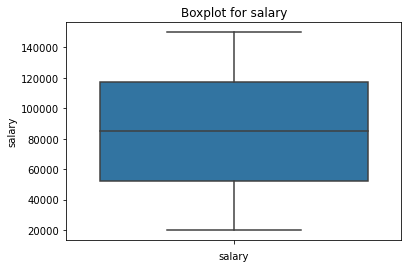

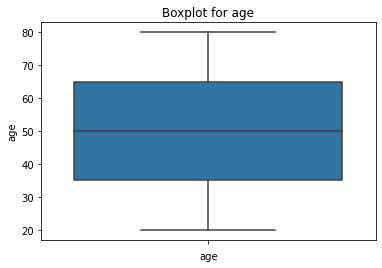

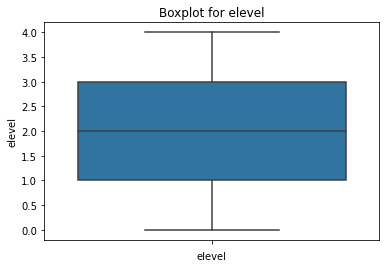

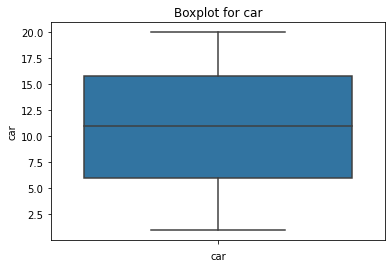

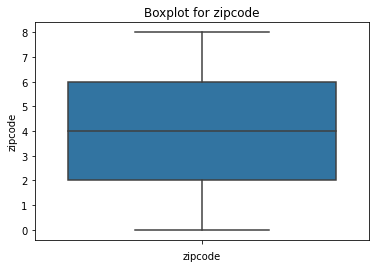

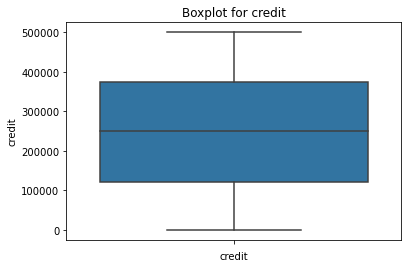

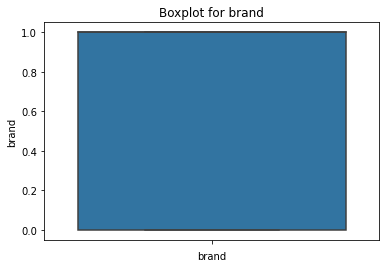

In [16]:
isnumeric_boxplots(df)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
def scale_dataframe(df):
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Create a copy of the DataFrame to avoid modifying the original
    scaled_df = df.copy()

    # Apply StandardScaler to numeric columns
    scaler = StandardScaler()
    scaled_df[numeric_columns] = scaler.fit_transform(scaled_df[numeric_columns])

    return scaled_df

In [22]:
df_scaled = df.copy()

In [23]:
scale_dataframe(df_scaled)

salary       age    elevel       car   zipcode    credit     brand
0     0.926419 -0.271579 -1.395945  0.602667 -0.015808  1.328210 -1.282067
1     0.583648  0.751393 -0.691962  0.082839  0.758807 -1.406080  0.779990
2    -0.181650 -1.521877 -1.395945  0.775943 -0.790424 -1.379992 -1.282067
3    -0.561673  0.069412  0.716002 -0.783540  0.371499 -1.434442  0.779990
4    -0.901534 -1.692373  0.716002  0.602667 -0.015808  0.714687 -1.282067
...        ...       ...       ...       ...       ...       ...       ...
9893  0.071865  1.433374 -0.691962  1.295770  1.533422  0.229580  0.779990
9894  1.175020  1.433374  0.012020 -0.610264 -0.015808  0.934514  0.779990
9895  0.343598  0.921888  0.012020  0.775943 -1.565039  1.034892  0.779990
9896 -1.720236 -1.465046 -0.691962  0.602667 -1.177731 -0.178861  0.779990
9897  0.306528 -0.896728 -0.691962 -1.476644  1.146114 -0.173178 -1.282067

[9898 rows x 7 columns]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  # You can replace this with the model of your choice

In [25]:
def run_prediction_model(df):
    # Assuming the last column is the label
    X = df.iloc[:, :-1]  # Features
    y = df.iloc[:, -1]   # Label

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize your model (replace RandomForestClassifier with the model of your choice)
    model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model (you can customize this based on your problem)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Optionally, you can perform cross-validation
    cross_val_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    print(f'Cross-Validation Scores: {cross_val_scores}')
    print(f'Mean Cross-Validation Score: {cross_val_scores.mean()}')

In [26]:
run_prediction_model(df)

Accuracy: 0.9202020202020202
Cross-Validation Scores: [0.92070707 0.92373737 0.92929293 0.9201617  0.91460334]
Mean Cross-Validation Score: 0.921700481316449


In [ ]:
# Predict with a sample df

In [27]:
from sklearn.ensemble import RandomForestClassifier 

In [28]:
def run_multi_column_prediction_model(df):
    # Initialize your model (replace RandomForestClassifier with the model of your choice)
    model = RandomForestClassifier()

    for column in df.columns[:-1]:  # Exclude the last column, assumed to be the label
        print(f'\nTraining and evaluating model for predicting: {column}')

        # Features and label
        X = df.drop(column, axis=1)  # Features
        y = df[column]  # Label

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model (you can customize this based on your problem)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}')

        # Optionally, you can perform cross-validation
        cross_val_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
        print(f'Cross-Validation Scores: {cross_val_scores}')
        print(f'Mean Cross-Validation Score: {cross_val_scores.mean()}')

In [30]:
from sklearn.tree import plot_tree

In [31]:
def run_multi_column_prediction_model_with_tree_plot(df):
    # Initialize your model (replace RandomForestClassifier with the model of your choice)
    model = RandomForestClassifier()

    for column in df.columns[:-1]:  # Exclude the last column, assumed to be the label
        print(f'\nTraining and evaluating model for predicting: {column}')

        # Features and label
        X = df.drop(column, axis=1)  # Features
        y = df[column]  # Label

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Plot one of the trees in the forest (you can customize this)
        plt.figure(figsize=(12, 8))
        plot_tree(model.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
        plt.title(f'Decision Tree for predicting: {column}')
        plt.show()

        # Rest of the evaluation can remain the same
        # Evaluate the model (you can customize this based on your problem)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}')

In [32]:
run_multi_column_prediction_model_with_tree_plot(df)


Training and evaluating model for predicting: salary


ValueError: Unknown label type: 'continuous'